In [0]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


 81% 33.0M/40.8M [00:00<00:00, 20.5MB/s]
100% 40.8M/40.8M [00:00<00:00, 52.4MB/s]
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 82.6MB/s]
 97% 384M/397M [00:07<00:00, 37.8MB/s]
100% 397M/397M [00:07<00:00, 55.2MB/s]
  0% 0.00/399k [00:00<?, ?B/s]
100% 399k/399k [00:00<00:00, 54.8MB/s]
  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 30.7MB/s]


In [22]:
%%time
df_train = pd.read_csv('input/data-science-bowl-2019/train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
df_test = pd.read_csv('input/data-science-bowl-2019/test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
df_train_label = pd.read_csv('input/data-science-bowl-2019/train_labels.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
df_specs = pd.read_csv('input/data-science-bowl-2019/specs.csv', header=0, sep=',', quotechar='"')
df_sample_submission = pd.read_csv('input/data-science-bowl-2019/sample_submission.csv', header=0, sep=',', quotechar='"')

# df_test = pd.read_csv('test.zip', compression='zip', header=0, sep=',', quotechar='"')

CPU times: user 1min, sys: 3.97 s, total: 1min 4s
Wall time: 1min 4s


### Understanding the train data

#### Sample train data

In [30]:
print("Sample train data (rows: %d, columns: %d)" %(df_train.shape[0], df_train.shape[1]))
df_train.head()

Sample train data (rows: 11341042, columns: 11)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


Clean up the train data by dropping the row where the installation_id never take any game

#### Clean up train data

In [0]:
keep_id = df_train[df_train.type == "Assessment"][['installation_id']].drop_duplicates()
df_train = pd.merge(df_train, keep_id, on="installation_id", how="inner")

In [36]:
print("Sample train data after clean up (rows: %d, columns: %d)" %(df_train.shape[0], df_train.shape[1]))
df_train.head()

Sample train data after clean up (rows: 8294138, columns: 11)


array(['Clip', 'Activity', 'Game', 'Assessment'], dtype=object)

#### Visualization

In [37]:
df_train.type.unique()

array(['Clip', 'Activity', 'Game', 'Assessment'], dtype=object)

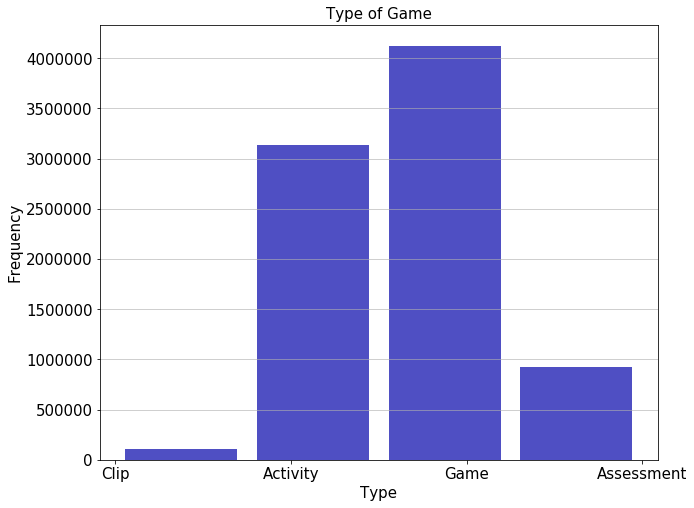

In [44]:
types_data = df_train['type']

plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=types_data, bins=4, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Type',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Type of Game',fontsize=15)
plt.show()

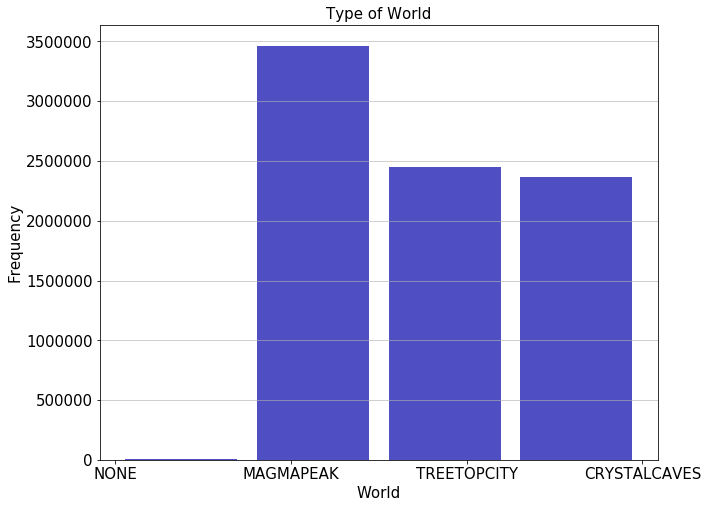

In [45]:
types_data = df_train['world']

plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=types_data, bins=4, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('World',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Type of World',fontsize=15)
plt.show()

### Understand the Test Data

Sample test data


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES
